In [1]:
#pip install psycopg2

In [2]:
# Auto ML toolu. Hangi model en iyi çıktı diye bakmaya yarar.
#pip install pycaret

In [1]:
import numpy as np
import pandas as pd

#Regular Expression
import re

#Görselleştirme
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

#Tarihsel işlemler
import datetime as dt
from datetime import datetime
from datetime import timedelta

#Matematiksel İşlemler
from math import sin, cos, sqrt, atan2, radians

#PosgreSql
import psycopg2 as pg
import pandas.io.sql as pd_sql

# Algorithms

from xgboost import XGBClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import accuracy_score, confusion_matrix

#Sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'mlxtend'

Çizgili alanlar arasındaki kodlar postgresql denemeleri, çalıştırmanıza gerek yok.

#  --------------------------------

plt.style.use('ggplot')
plt.rc('font', size=18)

connection_args = {
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'CITIBIKE2021',    # DB that we are connecting to
    'user' : 'postgres',
    'password' : '123456',
    'port': '5432'          # port we opened on AWS
}

# We will talk about this magic Python trick!
connection = pg.connect(**connection_args)

query = "SELECT * FROM citibike;"

df= pd_sql.read_sql(query, connection)

df.head()

df.shape

#  --------------------------------

In [1]:
data = pd.read_csv("/Users/tahayasinyilmaz/Documents/GitHub/project03/2022citybike.csv")

NameError: name 'pd' is not defined

In [6]:
data.head(5)

NameError: name 'data' is not defined

In [7]:
data.shape

NameError: name 'data' is not defined

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499192 entries, 0 to 6499191
Data columns (total 13 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ride_id                  object
 1   bike_type                object
 2   start_date               object
 3   end_date                 object
 4   start_station_name       object
 5   start_station_id         object
 6   end_station_name         object
 7   end_station_id           object
 8   start_station_latitude   object
 9   start_station_longitude  object
 10  end_station_latitude     object
 11  end_station_longitude    object
 12  user_type                object
dtypes: object(13)
memory usage: 644.6+ MB


In [8]:
data.describe()

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type
count,6499192,6499192,6499192,6499192,6499184,6499184.00,6483442,6483442,6.499192e+06,6.499192e+06,6.487619e+06,6.487619e+06,6499192
unique,6499190,4,4045443,4041108,1564,3113.00,1606,3054,4.545000e+03,4.528000e+03,4.101000e+03,4.079000e+03,3
top,ride_id,classic_bike,2022-04-28 08:24:23,2022-03-06 14:57:49,W 21 St & 6 Ave,6140.05,W 21 St & 6 Ave,6822.09,4.074174e+01,-7.399416e+01,4.074174e+01,-7.399416e+01,member
freq,3,3842163,18,47,30357,21914.00,30542,25255,2.970900e+04,2.970900e+04,2.969900e+04,2.969900e+04,5181339


In [9]:
data2 = data.copy()

## Boş Kolonlar var mı?

In [10]:
data2.isnull().any()

ride_id                    False
bike_type                  False
start_date                 False
end_date                   False
start_station_name          True
start_station_id            True
end_station_name            True
end_station_id              True
start_station_latitude     False
start_station_longitude    False
end_station_latitude        True
end_station_longitude       True
user_type                  False
dtype: bool

In [11]:
total = data2.isnull().sum().sort_values(ascending=False)
percent_1 = data2.isnull().sum()/data2.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(12)

,Total,%
end_station_name,15750,0.2
end_station_id,15750,0.2
end_station_latitude,11573,0.2
end_station_longitude,11573,0.2
start_station_name,8,0.0
start_station_id,8,0.0
ride_id,0,0.0
bike_type,0,0.0
start_date,0,0.0
end_date,0,0.0


In [12]:
data2.dropna(inplace= True)

In [13]:
data2.isnull().any()

ride_id                    False
bike_type                  False
start_date                 False
end_date                   False
start_station_name         False
start_station_id           False
end_station_name           False
end_station_id             False
start_station_latitude     False
start_station_longitude    False
end_station_latitude       False
end_station_longitude      False
user_type                  False
dtype: bool

## ride_id alanında tüm alanlar benzersizdir.

In [14]:
len(pd.unique(data2["ride_id"]))

6483440

In [15]:
data2.shape

(6483442, 13)

## bike_type

In [16]:
print (data2["bike_type"].unique())
len(pd.unique(data2["bike_type"]))

['classic_bike' 'electric_bike' 'docked_bike' 'rideable_type']


4

In [17]:
bikes = {"classic_bike": 0, "electric_bike": 1 , "docked_bike": 2, "rideable_type": 3}
data2['bike_type']= data2['bike_type'].map(bikes)

In [18]:
#print(data2[data2['bike_type'] == 3])
#data2['bike_type']
print (data2["bike_type"].unique())

[0 1 2 3]


## start_date ve end_date

In [19]:
data2[data2["start_date"] == 'start_date']
data2[data2["end_date"] == 'ended_at']

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type
1052418,ride_id,3,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2286186,ride_id,3,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4179580,ride_id,3,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [20]:
data2.drop(index=[1052418,2286186,4179580], axis=1 , inplace = True)
    

In [21]:
data2[data2["start_date"] == 'start_date']

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type


In [22]:
data2[["start_date","end_date"]] = data2[["start_date","end_date"]].apply(pd.to_datetime)

In [23]:
data2['month'] =pd.DatetimeIndex(data2["start_date"]).month

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6483439 entries, 0 to 6499191
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   ride_id                  object        
 1   bike_type                int64         
 2   start_date               datetime64[ns]
 3   end_date                 datetime64[ns]
 4   start_station_name       object        
 5   start_station_id         object        
 6   end_station_name         object        
 7   end_station_id           object        
 8   start_station_latitude   object        
 9   start_station_longitude  object        
 10  end_station_latitude     object        
 11  end_station_longitude    object        
 12  user_type                object        
 13  month                    int64         
dtypes: datetime64[ns](2), int64(2), object(10)
memory usage: 742.0+ MB


## user_type

In [25]:
print (data2["user_type"].unique())
len(pd.unique(data2["user_type"]))

['member' 'casual']


2

In [26]:
data2.user_type.value_counts()

member    5170727
casual    1312712
Name: user_type, dtype: int64

In [27]:
user = {"member": 0, "casual": 1}
data2['user_type']= data2['user_type'].map(user)

In [28]:
print (data2["user_type"].unique())

[0 1]


# yolculuk süresi dk cinsinden bulundu.

In [29]:
time_difference = data2["end_date"] - data2["start_date"]

In [30]:
#print(time_difference)
data2['trip_duration_dk'] = time_difference / timedelta(minutes=1)
data2.head()

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk
0,55262E4365A955A2,0,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.99116,40.692395,-73.993379,0,1,4.433333
1,D272F1B15D841EC0,0,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.98142,0,1,2.366667
2,D1FCEF55EB4A807F,0,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.74174,-73.994156,40.762009,-73.996975,0,1,24.766667
3,E9CBDC6A0162C068,1,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958.06,40.764175,-73.91584,40.768692,-73.924957,0,1,4.250000
4,2177A5B57326CE9B,1,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748.07,40.685376,-73.983021,40.696233,-73.991421,0,1,8.000000


In [31]:
data2.describe()

,bike_type,user_type,month,trip_duration_dk
count,6.483439e+06,6.483439e+06,6.483439e+06,6.483439e+06
mean,4.168650e-01,2.024716e-01,2.845680e+00,1.410797e+01
std,5.092270e-01,4.018418e-01,1.080335e+00,6.279293e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,-8.733333e+00
25%,0.000000e+00,0.000000e+00,2.000000e+00,5.250000e+00
50%,0.000000e+00,0.000000e+00,3.000000e+00,9.266667e+00
75%,1.000000e+00,0.000000e+00,4.000000e+00,1.630000e+01
max,2.000000e+00,1.000000e+00,4.000000e+00,5.798598e+04


# yolculuk süresi eksi olan kayıtlar gözüküyor.Başlangıç bitiş istasyonları,Başlangıç bitiş enlem boylamları aynı olduğundan bisikletler hareket etmediği görülüp yolculuktan vazgeçenler olmuş yorumu yapılabilir.

In [32]:
data2[data2['trip_duration_dk'] < 0]

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk
30344,46FE2651D94D8FBE,0,2022-01-04 16:20:26,2022-01-04 16:20:25,31 Ave & 30 St,6857.09,31 Ave & 30 St,6857.09,40.7647,-73.924031,40.7647,-73.924031,0,1,-0.016667
37650,B608DA99214059C7,0,2022-01-13 17:30:55,2022-01-13 17:30:53,58 St & Pier 4,3220.01,58 St & Pier 4,3220.01,40.646475,-74.026081,40.646475,-74.026081,0,1,-0.033333
86773,1001A198A440C813,0,2022-01-08 11:30:59,2022-01-08 11:30:58,W 104 St & Amsterdam Ave,7610.13,W 104 St & Amsterdam Ave,7610.13,40.799041,-73.966495,40.799041,-73.966495,0,1,-0.016667
92195,D7A679AF0AF79D64,0,2022-01-25 18:22:27,2022-01-25 18:22:26,Columbus Ave & W 95 St,7520.07,Columbus Ave & W 95 St,7520.07,40.791956,-73.968087,40.791956,-73.968087,0,1,-0.016667
385523,524C399C826C7228,0,2022-01-16 13:37:25,2022-01-16 13:37:24,Morningside Ave & W 123 St,7741.01,Morningside Ave & W 123 St,7741.01,40.81,-73.955151,40.81,-73.955151,0,1,-0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113751,FCF4CCE932599D76,0,2022-04-24 13:05:10,2022-04-24 13:05:01,Walker St & Baxter St,5351.07,Walker St & Baxter St,5351.07,40.717411,-73.999573,40.717411,-73.999573,1,4,-0.150000
6156787,79AE1AE2E2AB4F38,0,2022-04-19 22:22:33,2022-04-19 22:22:32,Ryer Ave & E 182 St,8494.06,Ryer Ave & E 182 St,8494.06,40.8558,-73.89956,40.8558,-73.89956,0,4,-0.016667
6172250,7296131E2A266712,0,2022-04-20 19:12:09,2022-04-20 19:12:08,Bayard St & Leonard St,5442.05,Bayard St & Leonard St,5442.05,40.719156,-73.948854,40.719156,-73.948854,0,4,-0.016667
6182133,F87899E38F98BA16,1,2022-04-08 09:06:35,2022-04-08 09:06:21,Cedar St & Evergreen Ave,4721.01,Cedar St & Evergreen Ave,4721.01,40.69671,-73.92807,40.69671,-73.92807,0,4,-0.233333


In [33]:
len(data2[data2['trip_duration_dk'] < 0])

92

Eksi seyahat süresi olan satırları kaldırdık.

In [34]:
data2.drop(index=(data2[data2['trip_duration_dk'] < 0].index) ,axis= 0 , inplace = True)

# start_station_id 

In [35]:
pattern = re.compile(r"[a-zA-Z]")

In [36]:
#örnek üzerinden regex testi
#print ( bool(re.search(pattern, '3303.01')))

In [37]:
data2["start_station_id"] = data2["start_station_id"].astype('string')

In [38]:
data2.shape

(6483347, 15)

In [39]:
data2.reset_index(inplace= True)

In [40]:
data2.rename(columns = {'index':'number'}, inplace = True)

In [41]:
data2

,number,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk
0,0,55262E4365A955A2,0,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.99116,40.692395,-73.993379,0,1,4.433333
1,1,D272F1B15D841EC0,0,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.98142,0,1,2.366667
2,2,D1FCEF55EB4A807F,0,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.74174,-73.994156,40.762009,-73.996975,0,1,24.766667
3,3,E9CBDC6A0162C068,1,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958.06,40.764175,-73.91584,40.768692,-73.924957,0,1,4.250000
4,4,2177A5B57326CE9B,1,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748.07,40.685376,-73.983021,40.696233,-73.991421,0,1,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483342,6499187,5EBE9D296B9D3E3C,0,2022-04-22 13:08:15,2022-04-22 13:29:31,Allen St & Rivington St,5414.06,W 29 St & 9 Ave,6416.06,40.720196,-73.989978,40.750073,-73.998393,0,4,21.266667
6483343,6499188,B66382DEDA84C464,0,2022-04-13 17:10:49,2022-04-13 17:26:08,St. Nicholas Terrace & Convent Ave,7937.15,E 138 St & Grand Concourse,7803.08,40.821294,-73.947868,40.813224,-73.930605,0,4,15.316667
6483344,6499189,9EC4C49BE4CB1A09,0,2022-04-12 15:58:47,2022-04-12 16:41:17,E 88 St & 1 Ave,7235.13,E 91 St & 2 Ave,7286.01,40.778301,-73.948813,40.781153,-73.94963,0,4,42.500000
6483345,6499190,C0188AB9FAEAA143,1,2022-04-28 15:52:49,2022-04-28 16:06:31,W 55 St & 6 Ave,6809.09,E 91 St & 2 Ave,7286.01,40.763189,-73.978434,40.781153,-73.94963,0,4,13.700000


In [42]:
data2.drop(axis=1, columns= 'number', inplace= True)

In [43]:
data2["start_station_id"]

0          4488.09
1          5616.08
2          6140.05
3          6850.01
4          4362.04
            ...   
6483342    5414.06
6483343    7937.15
6483344    7235.13
6483345    6809.09
6483346    7484.05
Name: start_station_id, Length: 6483347, dtype: string

In [44]:
not_numeric = []
for value in range(0, len(data2["start_station_id"])):    
    not_numeric.append(bool(re.match(pattern, data2["start_station_id"].iloc[value])))    

In [45]:
data2["start_not_numeric"] = pd.DataFrame(not_numeric)

In [46]:
data2[data2["start_not_numeric"] == True]

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk,start_not_numeric
331189,97BE6D001F65E203,0,2022-01-26 14:54:50,2022-01-26 14:55:03,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.75365,-73.996629,40.75404,-73.996466,0,1,0.216667,True
331342,2BB97F62637347E6,0,2022-01-26 13:12:44,2022-01-26 13:12:58,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.753653,-73.996616,40.75404,-73.996466,0,1,0.233333,True
331343,9624AC65344E2C65,0,2022-01-26 12:59:49,2022-01-26 13:00:25,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.753683,-73.996418,40.75404,-73.996466,0,1,0.600000,True
331344,A5CE9A166ADD035C,0,2022-01-26 13:48:13,2022-01-26 13:49:12,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.753671,-73.996549,40.75404,-73.996466,0,1,0.983333,True
331572,E7FF417AF04A6E61,0,2022-01-26 15:35:02,2022-01-26 15:37:53,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.753985,-73.996656,40.75404,-73.996466,0,1,2.850000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421944,68CF7DFEA02B3043,0,2022-04-28 16:14:18,2022-04-28 16:16:04,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.754001,-73.996075,40.75404,-73.996466,0,4,1.766667,True
5421945,E28661A71C52E029,0,2022-04-28 10:57:28,2022-04-28 11:00:00,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.754307,-73.996415,40.75404,-73.996466,0,4,2.533333,True
5421946,34087714EF0821B9,0,2022-04-28 11:19:44,2022-04-28 11:20:25,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.754462,-73.996633,40.75404,-73.996466,0,4,0.683333,True
6233104,6768356EE0267996,0,2022-04-21 13:05:58,2022-04-21 13:40:09,Lab - NYC,Lab - NYC,Grand St & Havemeyer St,5267.08,40.754302,-73.996555,40.712868,-73.956981,0,4,34.183333,True


In [47]:
data2 [data2["start_not_numeric"].isnull() == True ]

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk,start_not_numeric


In [48]:
data2.drop(index=(data2[data2["start_not_numeric"] == True].index) ,axis= 0 , inplace = True)
data2.drop(index=(data2[data2["start_not_numeric"].isnull()  == True].index) ,axis= 0 , inplace = True)

In [49]:
#data2["start_station_id"] = data2["start_station_id"].astype(int)

# end_station_id

In [50]:
data2["end_station_id"] = data2["end_station_id"].astype('string')

In [51]:
len(data2["end_station_id"])

6483231

In [52]:
len(data2)

6483231

In [53]:
data2.reset_index(inplace= True)

In [54]:
data2

,index,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk,start_not_numeric
0,0,55262E4365A955A2,0,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.99116,40.692395,-73.993379,0,1,4.433333,False
1,1,D272F1B15D841EC0,0,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.98142,0,1,2.366667,False
2,2,D1FCEF55EB4A807F,0,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.74174,-73.994156,40.762009,-73.996975,0,1,24.766667,False
3,3,E9CBDC6A0162C068,1,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958.06,40.764175,-73.91584,40.768692,-73.924957,0,1,4.250000,False
4,4,2177A5B57326CE9B,1,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748.07,40.685376,-73.983021,40.696233,-73.991421,0,1,8.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483226,6483342,5EBE9D296B9D3E3C,0,2022-04-22 13:08:15,2022-04-22 13:29:31,Allen St & Rivington St,5414.06,W 29 St & 9 Ave,6416.06,40.720196,-73.989978,40.750073,-73.998393,0,4,21.266667,False
6483227,6483343,B66382DEDA84C464,0,2022-04-13 17:10:49,2022-04-13 17:26:08,St. Nicholas Terrace & Convent Ave,7937.15,E 138 St & Grand Concourse,7803.08,40.821294,-73.947868,40.813224,-73.930605,0,4,15.316667,False
6483228,6483344,9EC4C49BE4CB1A09,0,2022-04-12 15:58:47,2022-04-12 16:41:17,E 88 St & 1 Ave,7235.13,E 91 St & 2 Ave,7286.01,40.778301,-73.948813,40.781153,-73.94963,0,4,42.500000,False
6483229,6483345,C0188AB9FAEAA143,1,2022-04-28 15:52:49,2022-04-28 16:06:31,W 55 St & 6 Ave,6809.09,E 91 St & 2 Ave,7286.01,40.763189,-73.978434,40.781153,-73.94963,0,4,13.700000,False


In [55]:
data2.drop(axis=1, columns= ['index'], inplace= True)

In [56]:
#data2.drop(axis=1, columns= ['end_not_numeric'], inplace= True)

In [57]:
data2

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk,start_not_numeric
0,55262E4365A955A2,0,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.99116,40.692395,-73.993379,0,1,4.433333,False
1,D272F1B15D841EC0,0,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.98142,0,1,2.366667,False
2,D1FCEF55EB4A807F,0,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.74174,-73.994156,40.762009,-73.996975,0,1,24.766667,False
3,E9CBDC6A0162C068,1,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958.06,40.764175,-73.91584,40.768692,-73.924957,0,1,4.250000,False
4,2177A5B57326CE9B,1,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748.07,40.685376,-73.983021,40.696233,-73.991421,0,1,8.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483226,5EBE9D296B9D3E3C,0,2022-04-22 13:08:15,2022-04-22 13:29:31,Allen St & Rivington St,5414.06,W 29 St & 9 Ave,6416.06,40.720196,-73.989978,40.750073,-73.998393,0,4,21.266667,False
6483227,B66382DEDA84C464,0,2022-04-13 17:10:49,2022-04-13 17:26:08,St. Nicholas Terrace & Convent Ave,7937.15,E 138 St & Grand Concourse,7803.08,40.821294,-73.947868,40.813224,-73.930605,0,4,15.316667,False
6483228,9EC4C49BE4CB1A09,0,2022-04-12 15:58:47,2022-04-12 16:41:17,E 88 St & 1 Ave,7235.13,E 91 St & 2 Ave,7286.01,40.778301,-73.948813,40.781153,-73.94963,0,4,42.500000,False
6483229,C0188AB9FAEAA143,1,2022-04-28 15:52:49,2022-04-28 16:06:31,W 55 St & 6 Ave,6809.09,E 91 St & 2 Ave,7286.01,40.763189,-73.978434,40.781153,-73.94963,0,4,13.700000,False


In [58]:
end_not_numeric = []
for value in range(0, len(data2["end_station_id"])):    
    end_not_numeric.append(bool(re.match(pattern, data2["end_station_id"].iloc[value])))  

In [59]:
data2["end_not_numeric"] = pd.DataFrame(end_not_numeric)

In [60]:
data2[data2["end_not_numeric"] == True]

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk,start_not_numeric,end_not_numeric
862,6614B6679A547898,1,2022-01-21 18:47:48,2022-01-21 19:27:16,W 30 St & 10 Ave,6459.07,Morgan Tech Shop parts testing,SYS030,40.752694,-74.002353,40.70325,-73.93183,0,1,39.466667,False,True
1019,480A56AF6842A8F4,0,2022-01-21 08:56:08,2022-01-21 09:07:52,Pacific St & Nevins St,4362.04,Morgan Tech Shop parts testing,SYS030,40.685376,-73.983021,40.70325,-73.93183,0,1,11.733333,False,True
79450,4EE344B84EA058AB,0,2022-01-06 18:07:37,2022-01-06 18:52:01,W 113 St & Broadway,7713.01,Riverview Park,JC057,40.805973,-73.964928,40.744319,-74.043991,0,1,44.400000,False,True
138788,2E5FB6F7E7FE4102,1,2022-01-21 15:26:05,2022-01-21 15:54:09,Jefferson Ave & Evergreen Ave,4517.03,Morgan Tech Shop parts testing,SYS030,40.68989,-73.91458,40.70325,-73.93183,1,1,28.066667,False,True
139039,0BA0EC45B68E57B1,0,2022-01-21 16:45:05,2022-01-21 17:27:48,E 16 St & Irving Pl,5938.11,Morgan Tech Shop parts testing,SYS030,40.735367,-73.987974,40.70325,-73.93183,0,1,42.716667,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360232,5B1D44EA69511400,0,2022-04-20 14:28:50,2022-04-20 15:15:09,W 27 St & 7 Ave,6247.06,Newport PATH,JC066,40.746647,-73.993915,40.727224,-74.033759,1,4,46.316667,False,True
6360684,644274254D36217E,0,2022-04-14 21:31:04,2022-04-14 22:17:06,E 20 St & Park Ave,6055.08,Bergen Ave,JC095,40.738274,-73.98752,40.722104,-74.071455,0,4,46.033333,False,True
6362848,309327D21222946F,0,2022-04-07 17:32:30,2022-04-07 18:11:04,6 Ave & Walker St,5430.1,Bergen Ave,JC095,40.719792,-74.005224,40.722104,-74.071455,0,4,38.566667,False,True
6362849,80629661956DAC6D,0,2022-04-21 16:57:08,2022-04-21 17:33:17,6 Ave & Walker St,5430.1,Bergen Ave,JC095,40.719792,-74.005224,40.722104,-74.071455,0,4,36.150000,False,True


In [61]:
data2[data2["end_not_numeric"].isnull()  == True]

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk,start_not_numeric,end_not_numeric


In [62]:
data2.drop(index=(data2[data2["end_not_numeric"] == True].index) ,axis= 0 , inplace = True)
data2.drop(index=(data2[data2["end_not_numeric"].isnull()  == True].index) ,axis= 0 , inplace = True)

In [63]:
data2["end_station_id"] = data2["end_station_id"].astype(float)

In [64]:
data2["end_station_id"]= data2["end_station_id"].round(0)

In [65]:
data2["end_station_id"] = data2["end_station_id"].astype(int)

In [66]:
data2.reset_index(inplace= True)
data2.drop(axis=1, columns= ['index'], inplace= True)

In [67]:
data2

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk,start_not_numeric,end_not_numeric
0,55262E4365A955A2,0,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605,40.688489,-73.99116,40.692395,-73.993379,0,1,4.433333,False,False
1,D272F1B15D841EC0,0,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659,40.727243,-73.976831,40.727408,-73.98142,0,1,2.366667,False,False
2,D1FCEF55EB4A807F,0,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756,40.74174,-73.994156,40.762009,-73.996975,0,1,24.766667,False,False
3,E9CBDC6A0162C068,1,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958,40.764175,-73.91584,40.768692,-73.924957,0,1,4.250000,False,False
4,2177A5B57326CE9B,1,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748,40.685376,-73.983021,40.696233,-73.991421,0,1,8.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6482806,5EBE9D296B9D3E3C,0,2022-04-22 13:08:15,2022-04-22 13:29:31,Allen St & Rivington St,5414.06,W 29 St & 9 Ave,6416,40.720196,-73.989978,40.750073,-73.998393,0,4,21.266667,False,False
6482807,B66382DEDA84C464,0,2022-04-13 17:10:49,2022-04-13 17:26:08,St. Nicholas Terrace & Convent Ave,7937.15,E 138 St & Grand Concourse,7803,40.821294,-73.947868,40.813224,-73.930605,0,4,15.316667,False,False
6482808,9EC4C49BE4CB1A09,0,2022-04-12 15:58:47,2022-04-12 16:41:17,E 88 St & 1 Ave,7235.13,E 91 St & 2 Ave,7286,40.778301,-73.948813,40.781153,-73.94963,0,4,42.500000,False,False
6482809,C0188AB9FAEAA143,1,2022-04-28 15:52:49,2022-04-28 16:06:31,W 55 St & 6 Ave,6809.09,E 91 St & 2 Ave,7286,40.763189,-73.978434,40.781153,-73.94963,0,4,13.700000,False,False


In [68]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482811 entries, 0 to 6482810
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   ride_id                  object        
 1   bike_type                int64         
 2   start_date               datetime64[ns]
 3   end_date                 datetime64[ns]
 4   start_station_name       object        
 5   start_station_id         string        
 6   end_station_name         object        
 7   end_station_id           int64         
 8   start_station_latitude   object        
 9   start_station_longitude  object        
 10  end_station_latitude     object        
 11  end_station_longitude    object        
 12  user_type                int64         
 13  month                    int64         
 14  trip_duration_dk         float64       
 15  start_not_numeric        bool          
 16  end_not_numeric          bool          
dtypes: bool(2), datetime64[ns](

# Çok fazla başlangıç ve bitiş istasyon sayısı olduğu için bu değerleri dummy yapmamız doğru olmayacaktır.

In [69]:
data2['end_station_id'].value_counts()

6140.05    30300
6822.09    27128
5329.03    24001
6364.07    23918
5905.14    23700
           ...  
8696.05       52
7888.10       43
8539.02       32
8435.06       15
7845.10       11
Name: start_station_id, Length: 1631, dtype: Int64

In [70]:
data2['end_station_id'].value_counts()

5779    51588
5788    50335
5905    47635
5626    46474
6364    45634
        ...  
8469       75
2971       74
8720       72
8696       61
8539       25
Name: end_station_id, Length: 1298, dtype: int64

# start_station_name ve end_station_name inceleme

In [71]:
data2 ["start_station_name"].describe()

count             6482811
unique               1559
top       W 21 St & 6 Ave
freq                30300
Name: start_station_name, dtype: object

In [72]:
data2 ["end_station_name"].describe()

count             6482811
unique               1560
top       W 21 St & 6 Ave
freq                30540
Name: end_station_name, dtype: object

In [73]:
data2.start_station_name.value_counts(10)

W 21 St & 6 Ave                    0.004674
1 Ave & E 68 St                    0.004185
Broadway & W 58 St                 0.003928
Broadway & E 21 St                 0.003863
West St & Chambers St              0.003702
                                     ...   
Sedgwick Ave & Hall of Fame Tce    0.000005
Nassau St\t& Duffield St           0.000004
Boerum Pl\t& Pacific St            0.000003
Folin St & E 181 St                0.000002
E 6 St 2 Ave                       0.000001
Name: start_station_name, Length: 1559, dtype: float64

# Yolculuk için günün hangi saatlerinin daha yoğun olduğu incelendi.

In [74]:
data2["trip_date"] = data2['start_date'].dt.date
data2["trip_hour"] = data2['start_date'].dt.hour


In [75]:
data2.head()

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk,start_not_numeric,end_not_numeric,trip_date,trip_hour
0,55262E4365A955A2,0,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605,40.688489,-73.99116,40.692395,-73.993379,0,1,4.433333,False,False,2022-01-18,8
1,D272F1B15D841EC0,0,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659,40.727243,-73.976831,40.727408,-73.98142,0,1,2.366667,False,False,2022-01-21,9
2,D1FCEF55EB4A807F,0,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756,40.74174,-73.994156,40.762009,-73.996975,0,1,24.766667,False,False,2022-01-22,14
3,E9CBDC6A0162C068,1,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958,40.764175,-73.91584,40.768692,-73.924957,0,1,4.250000,False,False,2022-01-19,14
4,2177A5B57326CE9B,1,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748,40.685376,-73.983021,40.696233,-73.991421,0,1,8.000000,False,False,2022-01-16,14


In [76]:
data2.trip_hour.value_counts()

17    615280
18    561431
16    526825
15    487570
14    446895
13    405833
8     405295
19    397463
12    371187
9     328744
11    321331
10    289804
7     272138
20    258404
21    185292
22    148024
6     129647
23    107747
0      70220
5      43384
1      43052
2      29026
3      19321
4      18898
Name: trip_hour, dtype: int64

In [77]:
def hiring_interval(trip_hour):
    if trip_hour > 19:
        return 'Evening'
    elif trip_hour > 12:
        return 'Afternoon'
    elif trip_hour > 6:
        return 'Morning'
    else:
        return 'Night'

In [78]:
data2["trip_hour"] = data2["trip_hour"].apply(hiring_interval)

In [79]:
data2.head()

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk,start_not_numeric,end_not_numeric,trip_date,trip_hour
0,55262E4365A955A2,0,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605,40.688489,-73.99116,40.692395,-73.993379,0,1,4.433333,False,False,2022-01-18,Morning
1,D272F1B15D841EC0,0,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659,40.727243,-73.976831,40.727408,-73.98142,0,1,2.366667,False,False,2022-01-21,Morning
2,D1FCEF55EB4A807F,0,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756,40.74174,-73.994156,40.762009,-73.996975,0,1,24.766667,False,False,2022-01-22,Afternoon
3,E9CBDC6A0162C068,1,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958,40.764175,-73.91584,40.768692,-73.924957,0,1,4.250000,False,False,2022-01-19,Afternoon
4,2177A5B57326CE9B,1,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748,40.685376,-73.983021,40.696233,-73.991421,0,1,8.000000,False,False,2022-01-16,Afternoon


In [80]:
data2.trip_hour.value_counts()

Afternoon    3441297
Morning      1988499
Evening       699467
Night         353548
Name: trip_hour, dtype: int64

# Yolculuk mesafesi bulundu.

In [81]:
data2["start_station_latitude"] = data2["start_station_latitude"].astype('float')
data2["start_station_longitude"] = data2["start_station_longitude"].astype('float')
data2["end_station_latitude"] = data2["end_station_latitude"].astype('float')
data2["end_station_longitude"] = data2["end_station_longitude"].astype('float')

In [82]:
# Convert degrees to radians
lat1 = [radians(lat) for lat in data2["start_station_latitude"]]
lon1 = [radians(lon) for lon in data2["start_station_longitude"]]
lat2 = [radians(lat) for lat in data2["end_station_latitude"]]
lon2 = [radians(lon) for lon in data2["end_station_longitude"]]

In [83]:
# Convert lists into series
lat1 = pd.Series(lat1)
lon1 = pd.Series(lon1)
lat2 = pd.Series(lat2)
lon2 = pd.Series(lon2)

# Calculate difference between each set of latitude and longitude
dlat = lat2 - lat1
dlon = lon2 - lon1

In [84]:
# Approximate radius of Earth in km
R = 6373.0

# Empty list to store trip distances
distance = []

for i in range(0, len(lat1)):
    
    a = sin(dlat[i] / 2)**2 + cos(lat1[i]) * cos(lat2[i]) * sin(dlon[i] / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Get distance and convert km to miles
    miles = (R * c) * .6214
    
    # Append miles travel to 'distance' list
    distance.append(miles)

In [85]:
# Add trip distance as new column to data frame
data2["tripdistance (mi)"] = distance
data2.head(5)

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk,start_not_numeric,end_not_numeric,trip_date,trip_hour,tripdistance (mi)
0,55262E4365A955A2,0,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605,40.688489,-73.991160,40.692395,-73.993379,0,1,4.433333,False,False,2022-01-18,Morning,0.293949
1,D272F1B15D841EC0,0,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659,40.727243,-73.976831,40.727408,-73.981420,0,1,2.366667,False,False,2022-01-21,Morning,0.240642
2,D1FCEF55EB4A807F,0,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756,40.741740,-73.994156,40.762009,-73.996975,0,1,24.766667,False,False,2022-01-22,Afternoon,1.408735
3,E9CBDC6A0162C068,1,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958,40.764175,-73.915840,40.768692,-73.924957,0,1,4.250000,False,False,2022-01-19,Afternoon,0.570347
4,2177A5B57326CE9B,1,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748,40.685376,-73.983021,40.696233,-73.991421,0,1,8.000000,False,False,2022-01-16,Afternoon,0.869986


# trip_duration_dk kolonu düzenlendi.

In [86]:
data2.loc[ data2['trip_duration_dk'] <= 60, 'trip_duration'] = 1
data2.loc[(data2['trip_duration_dk'] > 60) & (data2['trip_duration_dk'] <= 120), 'trip_duration'] = 2
data2.loc[(data2['trip_duration_dk'] > 120) & (data2['trip_duration_dk'] <= 180), 'trip_duration'] = 3
data2.loc[(data2['trip_duration_dk'] > 180), 'trip_duration'] = 4

In [87]:
data2.trip_duration.value_counts()

1.0    6402200
2.0      59878
4.0      12562
3.0       8171
Name: trip_duration, dtype: int64

In [88]:
data2.head()

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,...,end_station_longitude,user_type,month,trip_duration_dk,start_not_numeric,end_not_numeric,trip_date,trip_hour,tripdistance (mi),trip_duration
0,55262E4365A955A2,0,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605,40.688489,-73.991160,...,-73.993379,0,1,4.433333,False,False,2022-01-18,Morning,0.293949,1.0
1,D272F1B15D841EC0,0,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659,40.727243,-73.976831,...,-73.981420,0,1,2.366667,False,False,2022-01-21,Morning,0.240642,1.0
2,D1FCEF55EB4A807F,0,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756,40.741740,-73.994156,...,-73.996975,0,1,24.766667,False,False,2022-01-22,Afternoon,1.408735,1.0
3,E9CBDC6A0162C068,1,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958,40.764175,-73.915840,...,-73.924957,0,1,4.250000,False,False,2022-01-19,Afternoon,0.570347,1.0
4,2177A5B57326CE9B,1,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748,40.685376,-73.983021,...,-73.991421,0,1,8.000000,False,False,2022-01-16,Afternoon,0.869986,1.0


# trip_hour kolonu düzenlendi.

In [89]:
hour = {"Morning": 0, "Afternoon": 1 , "Evening": 2, "Night": 3}
data2['trip_hour_int']= data2['trip_hour'].map(hour)

In [90]:
data2.head()

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,...,user_type,month,trip_duration_dk,start_not_numeric,end_not_numeric,trip_date,trip_hour,tripdistance (mi),trip_duration,trip_hour_int
0,55262E4365A955A2,0,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605,40.688489,-73.991160,...,0,1,4.433333,False,False,2022-01-18,Morning,0.293949,1.0,0
1,D272F1B15D841EC0,0,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659,40.727243,-73.976831,...,0,1,2.366667,False,False,2022-01-21,Morning,0.240642,1.0,0
2,D1FCEF55EB4A807F,0,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756,40.741740,-73.994156,...,0,1,24.766667,False,False,2022-01-22,Afternoon,1.408735,1.0,1
3,E9CBDC6A0162C068,1,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958,40.764175,-73.915840,...,0,1,4.250000,False,False,2022-01-19,Afternoon,0.570347,1.0,1
4,2177A5B57326CE9B,1,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748,40.685376,-73.983021,...,0,1,8.000000,False,False,2022-01-16,Afternoon,0.869986,1.0,1


# tripdistance kolonu düzenlendi.

In [91]:
data2['tripdistance (mi)']

0          0.293949
1          0.240642
2          1.408735
3          0.570347
4          0.869986
             ...   
6482806    2.111541
6482807    1.061384
6482808    0.201694
6482809    1.953146
6482810    1.575005
Name: tripdistance (mi), Length: 6482811, dtype: float64

In [92]:
data2.describe()

,bike_type,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,month,trip_duration_dk,tripdistance (mi),trip_duration,trip_hour_int
count,6.482811e+06,6.482811e+06,6.482811e+06,6.482811e+06,6.482811e+06,6.482811e+06,6.482811e+06,6.482811e+06,6.482811e+06,6.482811e+06,6.482811e+06,6.482811e+06
mean,4.168639e-01,6.018091e+03,4.074005e+01,-7.397657e+01,4.073983e+01,-7.397672e+01,2.024719e-01,2.845651e+00,1.409444e+01,1.095169e+00,1.017570e+00,9.102340e-01
std,5.092262e-01,1.053089e+03,3.732888e-02,2.397097e-02,3.718514e-02,2.398511e-02,4.018421e-01,1.080335e+00,6.105734e+01,9.578107e-01,1.772259e-01,7.903902e-01
min,0.000000e+00,2.733000e+03,4.063338e+01,-7.402747e+01,4.063338e+01,-7.402747e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,5.342000e+03,4.071689e+01,-7.399344e+01,4.071689e+01,-7.399379e+01,0.000000e+00,2.000000e+00,5.250000e+00,4.662064e-01,1.000000e+00,0.000000e+00
50%,0.000000e+00,6.055000e+03,4.073945e+01,-7.398178e+01,4.073936e+01,-7.398192e+01,0.000000e+00,3.000000e+00,9.266667e+00,8.350925e-01,1.000000e+00,1.000000e+00
75%,1.000000e+00,6.765000e+03,4.076270e+01,-7.396222e+01,4.076227e+01,-7.396222e+01,0.000000e+00,4.000000e+00,1.630000e+01,1.432601e+00,1.000000e+00,1.000000e+00
max,2.000000e+00,8.841000e+03,4.088226e+01,-7.388145e+01,4.088226e+01,-7.388145e+01,1.000000e+00,4.000000e+00,5.798598e+04,1.521353e+01,4.000000e+00,3.000000e+00


In [93]:
data2.loc[ data2['tripdistance (mi)'] <= 4.5, 'tripdistance_int'] = 0
data2.loc[(data2['tripdistance (mi)'] > 4.5) & (data2['tripdistance (mi)'] <= 8.3), 'tripdistance_int'] = 1
data2.loc[(data2['tripdistance (mi)'] > 8.3) & (data2['tripdistance (mi)'] <= 1.4), 'tripdistance_int'] = 2
data2.loc[(data2['tripdistance (mi)'] > 1.4), 'tripdistance_int'] = 3

In [1]:
data2["tripdistance_int"] = data2["tripdistance_int"].astype(int)

NameError: name 'data2' is not defined

In [95]:
data2.head()

,ride_id,bike_type,start_date,end_date,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,...,month,trip_duration_dk,start_not_numeric,end_not_numeric,trip_date,trip_hour,tripdistance (mi),trip_duration,trip_hour_int,tripdistance_int
0,55262E4365A955A2,0,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605,40.688489,-73.991160,...,1,4.433333,False,False,2022-01-18,Morning,0.293949,1.0,0,0
1,D272F1B15D841EC0,0,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659,40.727243,-73.976831,...,1,2.366667,False,False,2022-01-21,Morning,0.240642,1.0,0,0
2,D1FCEF55EB4A807F,0,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756,40.741740,-73.994156,...,1,24.766667,False,False,2022-01-22,Afternoon,1.408735,1.0,1,3
3,E9CBDC6A0162C068,1,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958,40.764175,-73.915840,...,1,4.250000,False,False,2022-01-19,Afternoon,0.570347,1.0,1,0
4,2177A5B57326CE9B,1,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748,40.685376,-73.983021,...,1,8.000000,False,False,2022-01-16,Afternoon,0.869986,1.0,1,0


In [96]:
data3 = pd.DataFrame (data2.drop(axis=1,  
           columns= ['ride_id','start_date','end_date','start_station_name','end_station_name' ,
                     'start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude',
                     'trip_duration_dk','start_not_numeric','end_not_numeric','trip_date','trip_hour','tripdistance (mi)'],
                      ))

In [137]:
data3.head()

,bike_type,start_station_id,end_station_id,user_type,month,trip_duration,trip_hour_int,tripdistance_int
0,0,4488.09,4605,0,1,1.0,0,0
1,0,5616.08,5659,0,1,1.0,0,0
2,0,6140.05,6756,0,1,1.0,1,3
3,1,6850.01,6958,0,1,1.0,1,0
4,1,4362.04,4748,0,1,1.0,1,0


# Datayı modelleme aşaması için hazırlama

In [138]:
x = data3.drop('bike_type', axis=1)
y = data3['bike_type']

In [139]:
x

,start_station_id,end_station_id,user_type,month,trip_duration,trip_hour_int,tripdistance_int
0,4488.09,4605,0,1,1.0,0,0
1,5616.08,5659,0,1,1.0,0,0
2,6140.05,6756,0,1,1.0,1,3
3,6850.01,6958,0,1,1.0,1,0
4,4362.04,4748,0,1,1.0,1,0
...,...,...,...,...,...,...,...
6482806,5414.06,6416,0,4,1.0,1,3
6482807,7937.15,7803,0,4,1.0,1,0
6482808,7235.13,7286,0,4,1.0,1,0
6482809,6809.09,7286,0,4,1.0,1,3


In [140]:
y

0          0
1          0
2          0
3          1
4          1
          ..
6482806    0
6482807    0
6482808    0
6482809    1
6482810    1
Name: bike_type, Length: 6482811, dtype: int64

## Test train split

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=10)

In [102]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Pl

In [103]:
acc_sgd

57.16

In [104]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [105]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [106]:
acc_log

59.12

In [107]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please c

In [108]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please c

In [109]:
perceptron = Perceptron(max_iter=200)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [110]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [142]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [112]:
acc_decision_tree

81.14

## Modellerin Doğruluk Değerleri

In [113]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
81.14,Decision Tree
81.12,Random Forest
74.10,KNN
59.55,Perceptron
59.30,Naive Bayes
59.12,Logistic Regression
57.76,Support Vector Machines
57.16,Stochastic Gradient Decent


## Predict Proba ve Confusion Matrix

In [114]:
#Gözlemlerin sınıflara ait olma olasılıklarını elde etmek istiyorsanız predict_proba fonksiyonunu kullandık.

In [115]:
#Hata matrisi (Confusion Matrix) ile sonuçları değerlendireceğiz. 

In [116]:
decision_tree.predict_proba(X_test[:5], check_input=True)

array([[0.5 , 0.5 , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [117]:
print("Decision Tree: \n\n", confusion_matrix(Y_test, decision_tree.predict(X_test)))

Decision Tree: 

 [[606316 157768   2721]
 [287562 229605   1949]
 [  5713   2151   2778]]


In [120]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

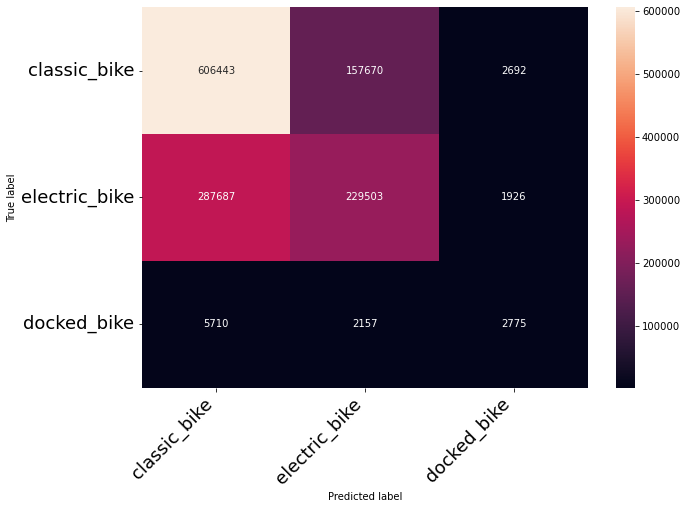

In [156]:
conf_mat = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
cm = print_confusion_matrix(conf_mat, ['classic_bike', 'electric_bike', 'docked_bike'])

## Sampling

## Oversampling

In [199]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(x,y)
decision_tree_ros = decision_tree.fit(X_resampled, y_resampled)

In [200]:
Counter(y_resampled)

Counter({0: 3832946, 1: 3832946, 2: 3832946})

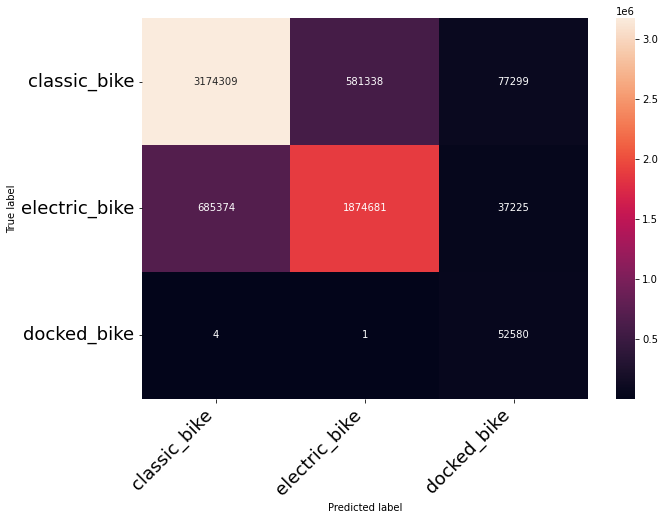

In [203]:
cm = print_confusion_matrix(confusion_matrix(y, decision_tree_ros.predict(x)), ['classic_bike', 'electric_bike', 'docked_bike'])


In [214]:
# docked_bike bulunacaksa oversampling kullanılabilir.

## SMOTE

In [204]:
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(x,y)
decision_tree_smote = decision_tree.fit(X_smoted, y_smoted)

/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


In [205]:
Counter(y_smoted)

Counter({0: 3832946, 1: 3832946, 2: 3832946})

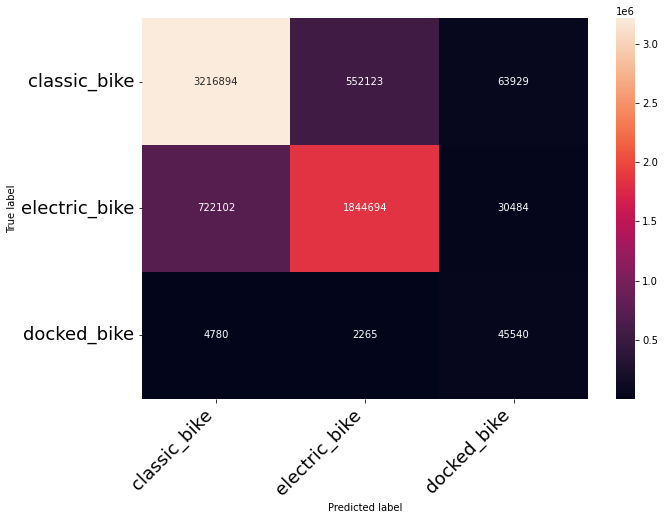

In [206]:
cm = print_confusion_matrix(confusion_matrix(y, decision_tree_smote.predict(x)), ['classic_bike', 'electric_bike', 'docked_bike'])


## ADASYN

In [207]:
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(x,y)
decision_tree_adasyn = decision_tree.fit(X_adasyn, y_adasyn)

/Users/tahayasinyilmaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


In [208]:
Counter(y_adasyn)

Counter({0: 3832946, 1: 3809565, 2: 3832474})

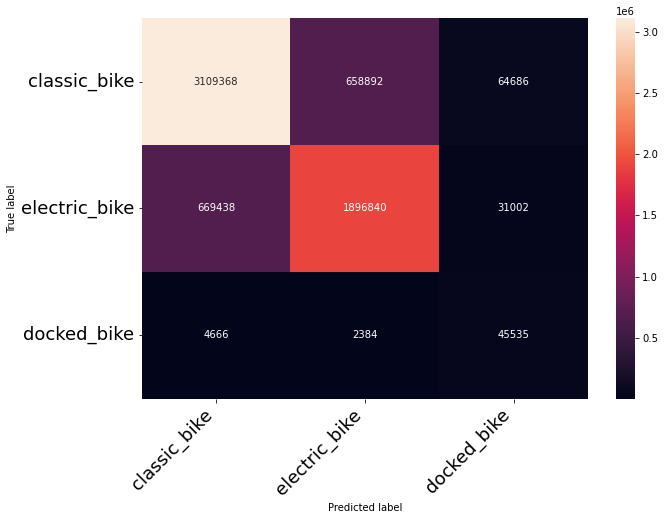

In [209]:
cm = print_confusion_matrix(confusion_matrix(y, decision_tree_adasyn.predict(x)), ['classic_bike', 'electric_bike', 'docked_bike'])

## Undersampling

In [210]:
X_under, y_under = RandomUnderSampler(random_state=42).fit_sample(x,y)
decision_tree_rus = decision_tree.fit(X_under, y_under)

In [211]:
Counter(y_under)

Counter({0: 52585, 1: 52585, 2: 52585})

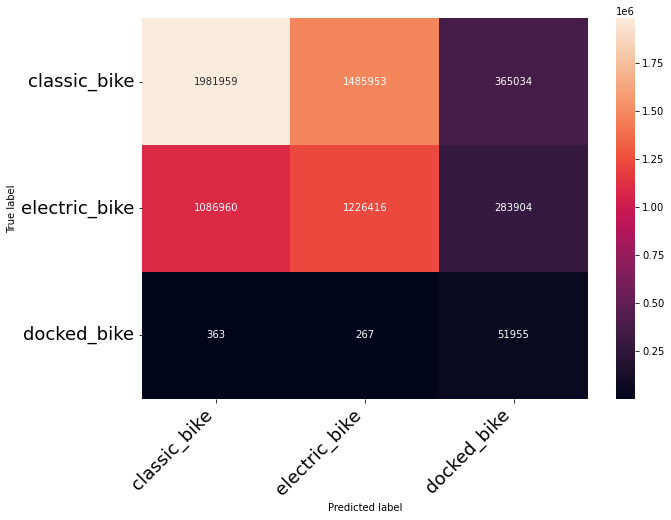

In [212]:
cm = print_confusion_matrix(confusion_matrix(y, decision_tree_rus.predict(x)), ['classic_bike', 'electric_bike', 'docked_bike'])